<a href="https://colab.research.google.com/github/DyonGuy/Meus-c-digos/blob/main/Tentativa-curva-de-ajuste.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

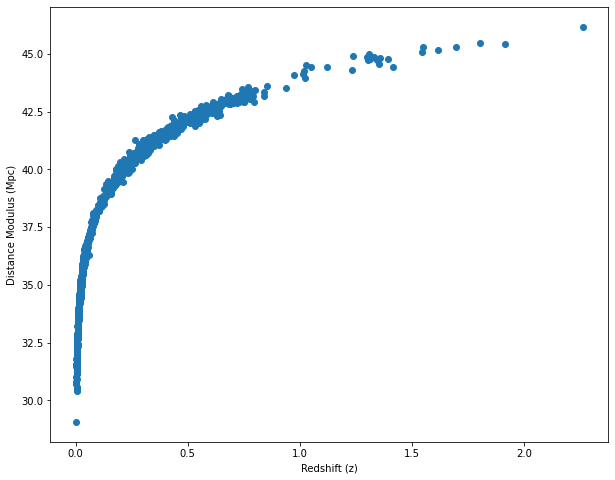

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 47 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CID                   1700 non-null   object 
 1   IDSURVEY              1700 non-null   int64  
 2   zHD                   1700 non-null   float64
 3   zHDERR                1700 non-null   float64
 4   zCMB                  1700 non-null   float64
 5   zCMBERR               1700 non-null   float64
 6   zHEL                  1700 non-null   float64
 7   zHELERR               1700 non-null   float64
 8   m_b_corr              1700 non-null   float64
 9   m_b_corr_err_DIAG     1700 non-null   float64
 10  MU_SH0ES              1700 non-null   float64
 11  MU_SH0ES_ERR_DIAG     1700 non-null   float64
 12  CEPH_DIST             1700 non-null   float64
 13  IS_CALIBRATOR         1700 non-null   int64  
 14  USED_IN_SH0ES_HF      1700 non-null   int64  
 15  c                    

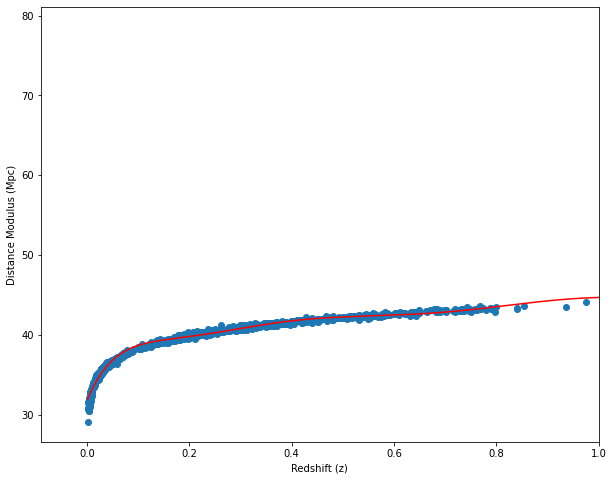

Parâmetros do polinômio de ajuste:
a_0 = -210.9432364712087
a_1 = 2178.4537714322387
a_2 = -9561.455083172823
a_3 = 23295.371821730067
a_4 = -34536.62539805972
a_5 = 32151.712893240663
a_6 = -18753.081810491156
a_7 = 6658.817083682628
a_8 = -1364.2559721614339
a_9 = 154.95013796199726
a_10 = 31.733429600631684


In [1]:
import urllib.request # Usar biblioteca Pandas para ler o arquivo como um DataFrame e pular a primeira linha com o cabeçalho
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# 1) BAIXANDO O ARQUIVO

url = "https://raw.githubusercontent.com/PantheonPlusSH0ES/DataRelease/main/Pantheon%2B_Data/4_DISTANCES_AND_COVAR/Pantheon%2BSH0ES.dat"
filename = "Pantheon+SH0ES.dat"

urllib.request.urlretrieve(url, filename)

# 2) GERANDO O GRÁFICO COM OS DADOS DO CATÁLOGO PANTHEON+

#primeira linha do arquivo contém o cabeçalho da tabela, com nomes de colunas e outros metadados, e não dados numéricos.
df = pd.read_csv(filename, skiprows=2, delim_whitespace=True, names=['CID', 'IDSURVEY', 'zHD', 'zHDERR', 'zCMB', 'zCMBERR', 'zHEL', 'zHELERR', 'm_b_corr', 'm_b_corr_err_DIAG', 'MU_SH0ES', 'MU_SH0ES_ERR_DIAG', 'CEPH_DIST', 'IS_CALIBRATOR', 'USED_IN_SH0ES_HF', 'c', 'cERR', 'x1', 'x1ERR', 'mB', 'mBERR', 'x0', 'x0ERR', 'COV_x1_c', 'COV_x1_x0', 'COV_c_x0', 'RA', 'DEC', 'HOST_RA', 'HOST_DEC', 'HOST_ANGSEP', 'VPEC', 'VPECERR', 'MWEBV', 'HOST_LOGMASS', 'HOST_LOGMASS_ERR', 'PKMJD', 'PKMJDERR', 'NDOF', 'FITCHI2', 'FITPROB', 'm_b_corr_err_RAW', 'm_b_corr_err_VPEC', 'biasCor_m_b', 'biasCorErr_m_b', 'biasCor_m_b_COVSCALE', 'biasCor_m_b_COVADD'])
# skiprows=1, especifica que o arquivo está separado por espaços em branco com o argumento delim_whitespace=True, e nomeia as colunas do DataFrame com o argumento names.

plt.figure(figsize=(10, 8))
plt.scatter(df["zCMB"], df["MU_SH0ES"])
plt.xlabel("Redshift (z)")
plt.ylabel("Distance Modulus (Mpc)")
plt.show()
df.info() #verificar se há algum valor nulo ou algum outro problema com os dados...

print(df["zCMB"].unique()) #Visualizando coluna z
print(df["MU_SH0ES"].unique()) #Visualizando coluna DM

# 3) FAZENDO A CURVA DE AJUSTE:

# Ajuste da curva polinomial aos dados
z = df["zCMB"]
MU = df["MU_SH0ES"]
coefficients = np.polyfit(z, MU, deg=10)  # deg é o grau do polinômio

# Plotagem do gráfico de dispersão e da curva ajustada
plt.figure(figsize=(10, 8))
plt.plot(z, MU, 'o')
z_range = np.linspace(z.min(), z.max(), 1000)
plt.plot(z_range, np.polyval(coefficients, z_range), 'r-')
plt.xlabel("Redshift (z)")
plt.ylabel("Distance Modulus (Mpc)")
plt.xlim(-0.09, 1.0)
plt.show()


print("Parâmetros do polinômio de ajuste:")
for i in range(len(coefficients)):
    print(f"a_{i} = {coefficients[i]}")